In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import norm
import statistics

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Visuals and Statistics
-
1. Load Data
2. Annual Funding graphic
3. Call Volume Over Time
4. Average Number of Calls per Dollar of Funding
5. P-values
6. Z-score
7. Visualize the proportion of calls

In [15]:
# 1. Load Data 

monthly_calls = pd.read_csv('monthly_call.csv')
daily_calls = pd.read_csv('daily_call.csv')

finance_data = pd.read_csv('new_call.csv')

In [16]:
display(monthly_calls.tail(), daily_calls.tail(), finance_data)

,PrimaryUnitCallSign,Year_Month,Call_Volume
139,Police,2021-08-01,10653
140,Police,2021-09-01,10160
141,Police,2021-10-01,9867
142,Police,2021-11-01,9802
143,Police,2021-12-01,9548


,PrimaryUnitCallSign,Year_Month_Day,Call_Volume
4379,Police,2021-12-27,215
4380,Police,2021-12-28,260
4381,Police,2021-12-29,324
4382,Police,2021-12-30,279
4383,Police,2021-12-31,349


,Year,Agency,Funding,Call_Volume,Call_Per_Funding
0,2016,Police,70530188.0,119940,0.001701
1,2017,Police,57567286.0,117257,0.002037
2,2018,Police,60627886.0,114386,0.001887
3,2019,Police,65205309.0,120843,0.001853
4,2020,Police,78142755.0,132241,0.001692
5,2021,Police,76240533.0,125169,0.001642
6,2016,White Bird,4985971.0,9473,0.001900
7,2017,White Bird,5998989.0,11738,0.001957
8,2018,White Bird,NaN,11996,NaN
9,2019,White Bird,9054972.0,12472,0.001377


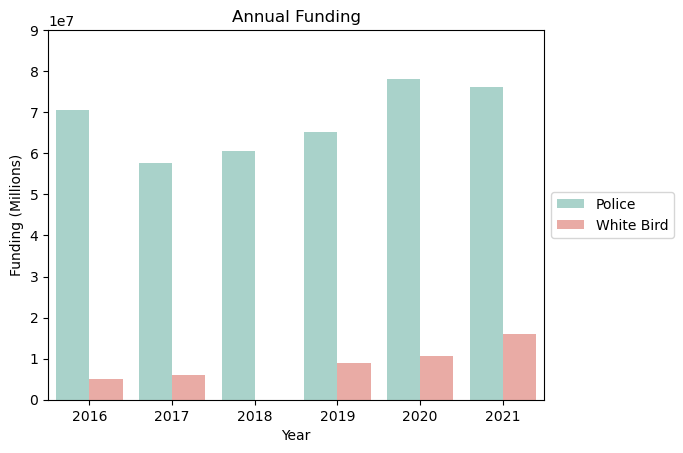

In [17]:
# 2. Annual Funding graphic

custom_colors = ["#A2D9CE", "#F4A19A"]

sns.barplot(finance_data, x="Year", y="Funding", hue="Agency", palette=custom_colors)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0, 90000000)
plt.title("Annual Funding")
plt.ylabel("Funding (Millions)")

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


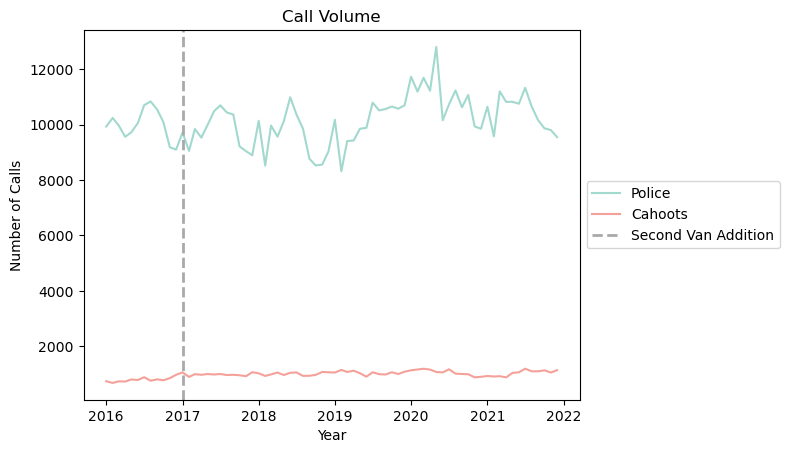

In [18]:
# 3. Call Volume Over Time

monthly_calls['Year_Month'] = pd.to_datetime(monthly_calls['Year_Month'])

custom_colors = ["#F4A19A", "#A2D9CE"]
ax = sns.lineplot(monthly_calls, x='Year_Month', y='Call_Volume', hue='PrimaryUnitCallSign', palette=custom_colors)

plt.xlabel('Year')
plt.ylabel('Number of Calls')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

jan_ticks = [dt for dt in monthly_calls['Year_Month'] if dt.month == 1]
event_date = pd.Timestamp('2017-01-01')

plt.axvline(x=event_date, color='darkgrey', linestyle='--', linewidth=2, label='Second Van Addition')

jan_ticks = [dt for dt in monthly_calls['Year_Month'] if dt.month == 1]

plt.title('Call Volume')

# Get handles and labels
handles, labels = ax.get_legend_handles_labels()

# Reorder the 'Police' label to the top of legend
index = labels.index('Police')
handles = [handles[index]] + handles[:index] + handles[index+1:]
labels = [labels[index]] + labels[:index] + labels[index+1:]

# Recreate the legend
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


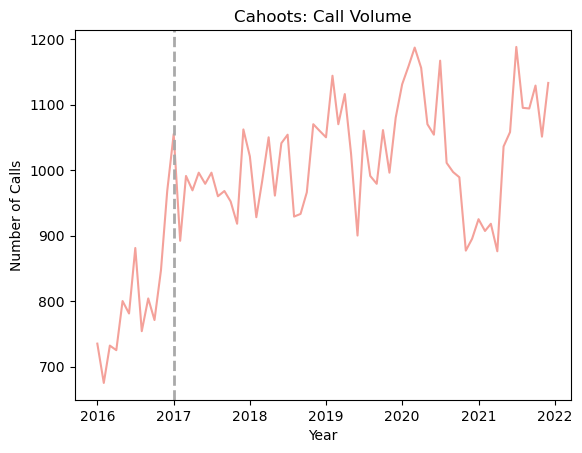

In [19]:
cahoot_monthly = monthly_calls[monthly_calls['PrimaryUnitCallSign'] == 'Cahoots']

ax = sns.lineplot(cahoot_monthly, x='Year_Month', y='Call_Volume', color = '#F4A19A')

plt.axvline(x=event_date, color='darkgrey', linestyle='--', linewidth=2, label='Second Van Addition')
plt.xlabel('Year')
plt.ylabel('Number of Calls')

plt.title('Cahoots: Call Volume')

plt.show()

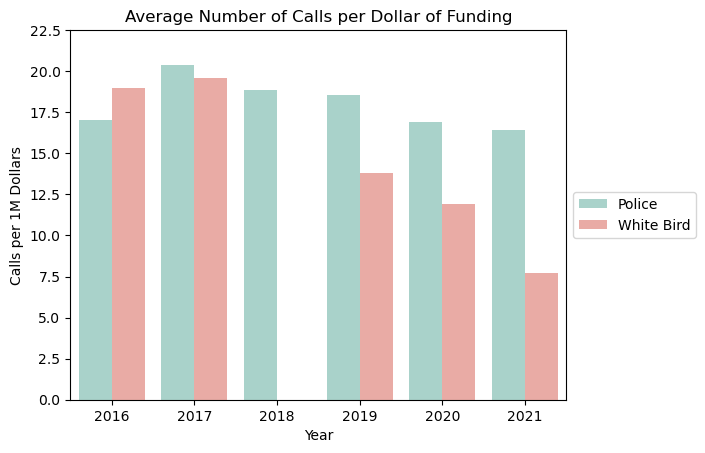

In [20]:
# 4. Average Number of Calls per Dollar of Funding

custom_colors = ["#A2D9CE", "#F4A19A"]

sns.barplot(finance_data, x='Year', y='Call_Per_Funding', hue='Agency', palette=custom_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

current_yticks = plt.yticks()[0]
new_labels = np.round(10000 * np.array(current_yticks), 2)  # Multiply each tick by 100
plt.yticks(ticks=current_yticks, labels=new_labels)

plt.title('Average Number of Calls per Dollar of Funding')
plt.ylabel('Calls per 1M Dollars')

plt.show()

In [21]:
# P-value: calls before and after event 

daily_calls['Year_Month_Day'] = pd.to_datetime(daily_calls['Year_Month_Day'])

# Define the event date
event_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2018-01-01')

cahoots_df = daily_calls[daily_calls['PrimaryUnitCallSign'] == 'Cahoots']
police_df = daily_calls[daily_calls['PrimaryUnitCallSign'] == 'Police']

# All before and after event 
before_event = daily_calls[daily_calls['Year_Month_Day'] < event_date]['Call_Volume']
after_event = daily_calls[(daily_calls['Year_Month_Day'] >= event_date) & (daily_calls['Year_Month_Day'] < end_date)]['Call_Volume']

# Cahoots before and after event 
cahoot_before = cahoots_df[cahoots_df['Year_Month_Day'] < event_date]['Call_Volume']
cahoot_after = cahoots_df[(cahoots_df['Year_Month_Day'] >= event_date) & (cahoots_df['Year_Month_Day'] < end_date)]['Call_Volume']

# Other agency before and after event 
police_before = police_df[police_df['Year_Month_Day'] < event_date]['Call_Volume']
police_after = police_df[(police_df['Year_Month_Day'] >= event_date) & (police_df['Year_Month_Day'] < end_date)]['Call_Volume']

t_stat, p_value = stats.ttest_ind(before_event, after_event, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

t_stat, p_value = stats.ttest_ind(cahoot_before, cahoot_after, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

t_stat, p_value = stats.ttest_ind(police_before, police_after, equal_var=False)  # Assumes unequal variance
print('P-value:', p_value)
print('')

P-value: 0.9911985820998885

P-value: 1.0765786889649284e-37

P-value: 0.11133431342349509



In [22]:
# Z-Score test: significance proportion before and after event
def z_test_two_proportions(x1, n1, x2, n2, alpha=0.05):
    p1 = x1 / n1
    p2 = x2 / n2
    p = (x1 + x2) / (n1 + n2)
    
    z_score = (p1 - p2) / ((p * (1 - p) * (1/n1 + 1/n2)) ** 0.5)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    
    # Output result
    print(f"Z-score: {z_score}")

In [23]:
# Summing Calls
cahoot_before_count = sum(cahoot_before)
cahoot_after_count = sum(cahoot_after)
police_before_count = sum(police_before)
police_after_count = sum(police_after)

total_before = cahoot_before_count + police_before_count
total_after = cahoot_after_count + police_after_count

# Mean Calls
mean_c_before = np.mean(cahoot_before)
mean_c_after = np.mean(cahoot_after)

z_test_two_proportions(cahoot_before_count, total_before,
                       cahoot_after_count, total_after, alpha=0.05)

Z-score: -16.478438907689664


In [24]:
# Call volume before and after addition of van
print(f"Average Cahoots call volume before the addition of a van: {mean_c_before}")
print(f"Average Cahoots call volume after the addtion of a van: {mean_c_after}")

Average Cahoots call volume before the addition of a van: 25.882513661202186
Average Cahoots call volume after the addtion of a van: 32.15890410958904


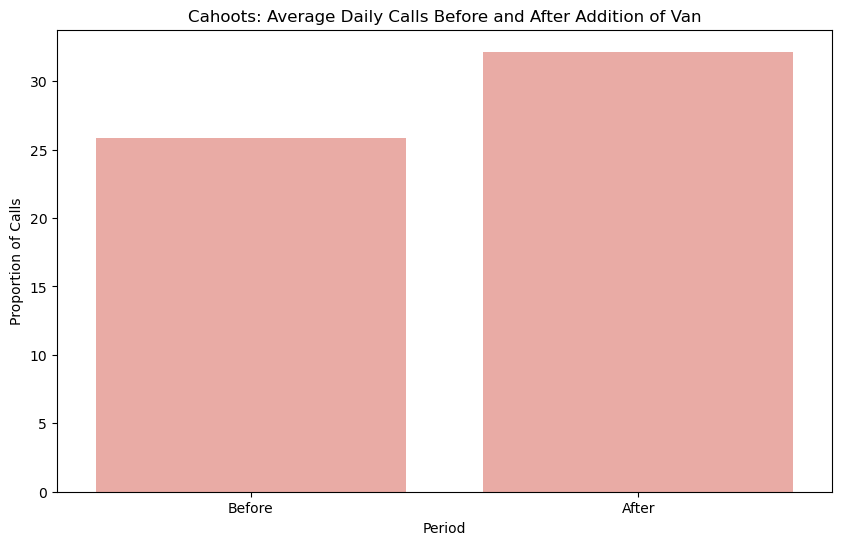

In [25]:
# 7. Visualize the proportion of calls
proportions = pd.DataFrame({
    'Agency': ['Cahoots', 'Cahoots'],
    'Event_Occurrence': ['Before', 'After'],
    'Proportion_of_Calls': [
        mean_c_before,
        mean_c_after
    ]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=proportions, x='Event_Occurrence', y='Proportion_of_Calls', color="#F4A19A")
plt.title('Cahoots: Average Daily Calls Before and After Addition of Van')
plt.ylabel('Proportion of Calls')
plt.xlabel('Period')
plt.show()